Positive R2, option 1 works best (positive R2), Option 3 negative, better than regression

https://colab.research.google.com/drive/11Z5mq6v7dadIwB7P0E19ZiNy1GHwkjWI#scrollTo=TaUijhlI4Ul8&line=22&uniqifier=1

In [1]:
# 1. Packages Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from google.colab import files
upload = files.upload() #upload all the files from Q1 Master Thesis den

Saving [dnk]_[size]_[monthly]_[vw].xlsx to [dnk]_[size]_[monthly]_[vw].xlsx
Saving [dnk]_[value]_[monthly]_[vw].xlsx to [dnk]_[value]_[monthly]_[vw].xlsx
Saving Denmark 3M Bond Yield.xlsx to Denmark 3M Bond Yield.xlsx
Saving Denmark 6M Bond Yield.xlsx to Denmark 6M Bond Yield.xlsx
Saving Denmark 10Y Bond Yield.xlsx to Denmark 10Y Bond Yield.xlsx
Saving market_returns.csv to market_returns.csv
Saving MARSK_B_PX_LAST.xlsx to MARSK_B_PX_LAST.xlsx
Saving NOVO_NORDISK_PX_Last.xlsx to NOVO_NORDISK_PX_Last.xlsx
Saving Risk Free denmark.xlsx.xlsm to Risk Free denmark.xlsx.xlsm


In [2]:
# 2.1 Fama-French Three Factors Model Data

# denmark, MARSK, returns
MARSK_monthly = pd.read_excel("MARSK_B_PX_LAST.xlsx") # read data

MARSK_monthly_array = MARSK_monthly.to_numpy() # important in order to be able to process data
MARSK_monthly_returns = MARSK_monthly_array[:,2] 
MARSK_returns = MARSK_monthly_returns[27:351] # start 1994-01-31, end 2020-12-31

print(MARSK_monthly[27:351])
MARSK_returns.shape


         Dates    PX_LAST    Return  Unnamed: 3  MAERSKB DC Equity
27  1994-01-31   2182.350  0.000000         NaN                NaN
28  1994-02-28   2264.042  0.037433         NaN                NaN
29  1994-03-31   2246.537 -0.007732         NaN                NaN
30  1994-04-29   2264.042  0.007792         NaN                NaN
31  1994-05-31   2053.976 -0.092784         NaN                NaN
..         ...        ...       ...         ...                ...
346 2020-08-31   9564.000  0.184250         NaN                NaN
347 2020-09-30  10080.000  0.053952         NaN                NaN
348 2020-10-30  10210.000  0.012897         NaN                NaN
349 2020-11-30  12735.000  0.247307         NaN                NaN
350 2020-12-31  13595.000  0.067530         NaN                NaN

[324 rows x 5 columns]


(324,)

In [3]:
# 2.2 Fama-French Three Factors Model Data

# denway, Size, SMB
den_size_monthly_vw = pd.read_excel('[dnk]_[size]_[monthly]_[vw].xlsx') # read data
den_size_monthly_vw_array = den_size_monthly_vw.to_numpy() # important in order to be able to process data

den_size_monthly_vw_returns = den_size_monthly_vw_array[:,6] 
SMB_returns_den = den_size_monthly_vw_returns [95:419] # for t-1 for 12/1993-11/2020

print(den_size_monthly_vw_array[95:419])
SMB_returns_den.shape

[['dnk' 'size' 'monthly' ... 2.0 Timestamp('1993-12-31 00:00:00')
  -0.0094201767516365]
 ['dnk' 'size' 'monthly' ... 4.0 Timestamp('1994-01-31 00:00:00')
  0.0965915896155241]
 ['dnk' 'size' 'monthly' ... 4.0 Timestamp('1994-02-28 00:00:00')
  -0.0023486215107128]
 ...
 ['dnk' 'size' 'monthly' ... 5.0 Timestamp('2020-09-30 00:00:00')
  -0.010440814664479]
 ['dnk' 'size' 'monthly' ... 5.0 Timestamp('2020-10-31 00:00:00')
  -0.0137999503275805]
 ['dnk' 'size' 'monthly' ... 5.0 Timestamp('2020-11-30 00:00:00')
  0.0502003031671247]]


(324,)

In [4]:
# 2.3 Fama-French Three Factors Model Data

# denway, Value, HML
den_value_monthly_vw = pd.read_excel('[dnk]_[value]_[monthly]_[vw].xlsx') # read data
den_value_monthly_vw_array = den_value_monthly_vw.to_numpy() # important in order to be able to process data

den_value_monthly_vw_returns = den_value_monthly_vw_array[:,6] 
HML_returns_den = den_value_monthly_vw_returns[83:407] # for t-1 for 12/1993 to 11/2020

print(den_value_monthly_vw_array[83:407])
HML_returns_den.shape

[['dnk' 'value' 'monthly' ... 13.0 Timestamp('1993-12-31 00:00:00')
  -0.0223538680243769]
 ['dnk' 'value' 'monthly' ... 13.0 Timestamp('1994-01-31 00:00:00')
  0.0649267711965017]
 ['dnk' 'value' 'monthly' ... 13.0 Timestamp('1994-02-28 00:00:00')
  -0.0026961198646989]
 ...
 ['dnk' 'value' 'monthly' ... 18.0 Timestamp('2020-09-30 00:00:00')
  0.0053780931780133]
 ['dnk' 'value' 'monthly' ... 18.0 Timestamp('2020-10-31 00:00:00')
  -0.0217790580907819]
 ['dnk' 'value' 'monthly' ... 18.0 Timestamp('2020-11-30 00:00:00')
  0.0469818786751231]]


(324,)

In [5]:
#upload Risk Free denway.xlsx
#upload = files.upload()

In [6]:
# 2.4 Fama-French Three Factors Model Data

# denmark, Historical risk-free rate
risk_free_den = pd.read_excel('Risk Free denmark.xlsx.xlsm') # read data
risk_free_den_array = risk_free_den.to_numpy() # important in order to be able to process data

#risk_free_den_returns = risk_free_den_array[:,6]/100 
#rf_den = risk_free_den_returns[3:327]
rf_den_t1 = risk_free_den_array[0:324,1]/100 # risk free t-1
rf_den = risk_free_den_array[1:325,1]/100

print(risk_free_den[1:325])
rf_den.shape

        Date  Annualized  \
1    1994M01    0.614728   
2    1994M02    0.581436   
3    1994M03    0.581436   
4    1994M04    0.548830   
5    1994M05    0.516897   
..       ...         ...   
320  2020M08    0.000000   
321  2020M09    0.000000   
322  2020M10    0.000000   
323  2020M11    0.000000   
324  2020M12    0.000000   

     The Nationalbanks official rates - Discount rate (Aug 1987-)  Unnamed: 3  \
1                                                 5.75                    NaN   
2                                                 5.50                    NaN   
3                                                 5.50                    NaN   
4                                                 5.25                    NaN   
5                                                 5.00                    NaN   
..                                                 ...                    ...   
320                                               0.00                    NaN   
321            

(324,)

In [7]:
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
#help(stats.linregress)

In [8]:
import pandas_datareader as web
# If problem: "ModuleNotFoundError: No module named 'pandas_datareader'"
# Then open cmd --> Anaconda prompt --> activate environment --> paste the code below
# conda install -c anaconda pandas-datareader

### EXCESS RETURNS

In [9]:
excess_returns_den = MARSK_returns - rf_den
print(excess_returns_den)

[-0.006147282345 0.031618681754000004 -0.013546107632
 0.0023036897570000003 -0.097952582404 0.007763023456000001 0.047698607636
 -0.056852326934000004 -0.097865460604 -0.098048315274 0.066503171396
 0.057251348156 0.008020635086 -0.046588966304 -0.125098208607
 0.044043079003 0.060179339713 -0.081487306427 0.047907037725000004
 0.058933483466 -0.029265210463999998 -0.057638247424 -0.008113456826
 -0.004249926655 0.159442564949 0.0016616991239999995 0.004711758903999999
 0.032900472822 0.023627125592 -0.0057146612 0.025610172192 0.065417215362
 -0.024488061658 0.011452557522000001 0.016028074812000002 0.034448299442
 0.164310292872 0.034747673672000004 0.044440229282 0.062843108362
 0.08384585663199999 0.052274113232 0.273857248072 -0.07160360087800001
 0.203997250172 -0.19120388264399998 -0.015886652934 0.135854037956
 -0.058942122804 0.055436962166 0.063280175586 -0.09713666765399999
 0.019320087848 -0.059848159022000004 -0.051287349312000005
 -0.253668379412 -0.020916707575 0.156767

### MARKET RETURNS

In [10]:
# Output variables, y

mkt_ret = pd.read_csv('market_returns.csv') 

mkt_ret_array = mkt_ret.to_numpy()

# creating market returns for denden
# Note: we need to start from 12/1993 for denmark 
mkt_ret_den = mkt_ret_array[6727:7051] # 324 datapoints for t-1
print(mkt_ret_den)


[['DNK' '1993-12-31' 80 ... 0.06546354 0.0562544215 0.06320054]
 ['DNK' '1994-01-31' 80 ... 0.2612286908 0.1182600546 0.2578135714]
 ['DNK' '1994-02-28' 82 ... 0.0127726364 -0.012014138 0.0106526364]
 ...
 ['DNK' '2020-09-30' 158 ... -0.000887003 0.0043388539 -0.000963003]
 ['DNK' '2020-10-31' 159 ... -0.022776184 -0.022414255 -0.020747988]
 ['DNK' '2020-11-30' 157 ... 0.1648716192 0.1015428341 0.1403171431]]


In [11]:
mkt_ret_den_df = pd.DataFrame(mkt_ret_den)
#creating the excess market returns
y_den = mkt_ret_den[:,7] - rf_den_t1 # mkt_vw

# I print this out to see it as panel data
y_df = pd.DataFrame(y_den) # This represents output or column: # mkt_vw
y_df.columns = ['mkt_vw']
R_m_den = np.asarray(y_den).astype(np.float32)

print(R_m_den)
print(len(R_m_den))

[ 5.16831204e-02  1.14618771e-01 -1.57084987e-02 -2.96406858e-02
  5.69004565e-03 -4.95085232e-02  2.94112507e-02  3.51252854e-02
 -6.02960885e-02  1.75424735e-04  1.76581703e-02 -4.17790413e-02
  2.22517699e-02  1.86658576e-02  2.95423102e-02  1.53147615e-03
  3.76157425e-02  2.92533636e-02 -1.00071309e-02  5.69161326e-02
 -6.29004911e-02  5.45647088e-03 -1.05294620e-03 -1.01890471e-02
  1.60197373e-02  1.43054426e-02  6.41410705e-03 -1.66087188e-02
 -5.70694264e-03  1.21344049e-02  2.27089040e-02  1.27453199e-02
  4.19736356e-02  5.05963340e-03  3.01357582e-02  1.95615906e-02
  1.77796632e-02  3.51233482e-02 -6.36436918e-04  8.22284957e-04
 -1.63438618e-02  6.42420575e-02  1.02864821e-02  2.69025918e-02
 -4.54204679e-02  8.47832486e-02 -2.01776959e-02 -4.96229343e-03
  5.50997853e-02  9.96787101e-03  9.75539628e-03  8.37352127e-02
 -1.76297054e-02  1.49155119e-02 -2.31086873e-02  1.10204471e-02
 -9.44365859e-02 -3.97025347e-02  3.48751657e-02 -3.48639637e-02
  7.20982775e-02 -2.57012

### REGRESSION

In [12]:
# df = pd.DataFrame(market_returns_den,HML_returns_den,SMB_returns_den)
# print(df)
X1 = R_m_den
X2 = HML_returns_den
X3 = SMB_returns_den

# regressors - that which regresses, or causes regression
X = R_m_den
X_df = pd.DataFrame(X) # This represents output or column: # R_m_den
X_df.columns = ['X1 (R_m_den)']
X_df.insert(1, 'X2 (HML_returns_den)', HML_returns_den, True)
X_df.insert(1, 'X3 (SMB_returns_den)', SMB_returns_den, True)
print(X_df)

# regressand - the dependent variable in a regression
Y = excess_returns_den



     X1 (R_m_den) X3 (SMB_returns_den) X2 (HML_returns_den)
0        0.051683             -0.00942            -0.022354
1        0.114619             0.096592             0.064927
2       -0.015708            -0.002349            -0.002696
3       -0.029641            -0.007998            -0.023873
4        0.005690            -0.014027             0.009771
..            ...                  ...                  ...
319      0.096582            -0.030068            -0.021403
320      0.038164             0.002759             0.002656
321      0.004415            -0.010441             0.005378
322     -0.022344              -0.0138            -0.021779
323      0.101611               0.0502             0.046982

[324 rows x 3 columns]


In [13]:
from sklearn import linear_model
import statsmodels.api as sm
# ACTIVATE YOUR CONDA ENVIRONEMENT AND TYPE THIS:
# conda install -c conda-forge statsmodels

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
X_df = X_df.to_numpy() #dataframe to num
X_df.shape

(324, 3)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_df, Y, test_size = 0.3, random_state = 100)

In [16]:
#mlr = LinearRegression()  
#mlr.fit(X_df, Y)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)


LinearRegression()

In [17]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:",mlr.coef_)

Intercept:  0.01496247365180089
Coefficients: [ 0.0833025   0.02647135 -0.25170483]


In [18]:
# rf_den
# MARSK_returns
# HML_returns_den
# SMB_returns_den

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score

# compute with formulas from the theory
yhat = mlr.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)   
SS_Total = sum((y_test-np.mean(y_test))**2)     

# r_squared
r_squared_FF3 = 1 - (float(SS_Residual))/SS_Total
print("R2 =", r_squared_FF3)

# adjusted_r_squared 
#adjusted_r_squared = 1 - (1-r_squared_FF3)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#print(adjusted_r_squared)

# Mean squared error
MSE_reg = mean_squared_error(y_test,yhat)
# Mean absolute error
MAE_reg = mean_absolute_error(y_test,yhat)
# Root mean squared error
RMSE_reg = mean_squared_error(y_test,yhat)**0.5

print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE_reg )

R2 = -0.3698618562851137
MSE = 0.008804653635471345
MAE = 0.07817822576590368
Root MSE = 0.09383311587851778


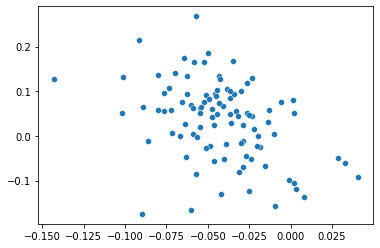

In [72]:
#heteroscedasticity visualization - no clear signs of heteroscedasticity 
residuals = y_test-yhat
sns.scatterplot(x= yhat, y= residuals)

In [20]:
# Normalize and scale feature data
from sklearn.preprocessing import MinMaxScaler

# help(MinMaxScaler)
scaler = MinMaxScaler()

In [21]:
# Now we need to fit our scalar to our training data, so, fit on X_train
# This calculates the parameters it needs to perform the actual scaling later on

scaler.fit(x_train)

# The only reason why we run it on our training set is because we want to prevent what is known as "Data Leakage" from the test set
# We don't want to assume that we have prior information of the test set. So, we only fit our scalar to the training set.
# This is so we don't try to cheat and look into the test set.

MinMaxScaler()

In [22]:
x_train = scaler.transform(x_train) # we just scale the test training data set to be between 0 and 1
x_test = scaler.transform(x_test) # we just scale the test data set to be between 0 and 1

In [23]:
# Now, if we take a look at these values, we can see that they have been scaled for X_train to be between 0 and 1.

x_train # X_train.min() # X_train.max()

# And again, we are only fitting on the training set to not acertain information from the test set because it is essentially cheating.

array([[0.33688032, 0.65064261, 0.34576624],
       [0.6149962 , 0.5459061 , 0.38497339],
       [0.40162899, 0.65014919, 0.47730704],
       [0.66102806, 0.1315687 , 0.26448444],
       [0.74615406, 0.54612969, 0.41070297],
       [0.58706084, 0.64555749, 0.47567434],
       [0.47434537, 0.49108759, 0.46906532],
       [0.48193827, 0.67840093, 0.55640538],
       [0.37766847, 0.86319673, 0.49959798],
       [0.57827695, 0.08911823, 0.26090751],
       [0.59797194, 0.49162561, 0.4238358 ],
       [0.66096118, 0.58461108, 0.50533986],
       [0.69691955, 0.49986116, 0.43265193],
       [0.79011786, 0.39743307, 0.38378027],
       [0.51249594, 0.5605001 , 0.31873791],
       [0.60448429, 0.63495292, 0.37158534],
       [0.69131719, 0.76954953, 0.61178305],
       [0.40597431, 0.78089458, 0.47284437],
       [0.38631861, 0.63479076, 0.47185445],
       [0.49029312, 0.56070148, 0.42117607],
       [0.40226247, 0.46684437, 0.43839283],
       [0.39217326, 0.49383542, 0.29793594],
       [0.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
# The two parameter calls that we need to be aware of is "units" and "activation function".
# "units" is just another word for neurons. Actually, it means: How many neurons are actually gonna be in this layer.
### model = Sequential([Dense(368,activation='relu'), # open your call for Sequential... you actually pass in a list of those layers.
                    ### Dense(368,activation='relu'),
                    ### Dense(1)]) # since this is my last output layer, I dont want any activation function

In [26]:
# The other way we can do this is the following. This is going to be our preferred method.
### model = Sequential() # creating an empty sequential model

# More easy to edit now, if we for example want to delete a layer or edit it.
# Hidden layers, added one-by-one, in this case 3 layers, with 368 neurons each, using "relu"

### model.add(Dense(368,activation='relu')) 
### model.add(Dense(368,activation='relu')) 
### model.add(Dense(368,activation='relu')) 

# Output later

### model.add(Dense(1)) # since this is my last output layer, I dont want any activation function

# Our very last layer, will be just be 1 final output node.
# So, the final output layer is actually pretty important.
# That is going to be determined by out actual data in our actual situation what we are trying to predict.

# Recall, with this particular data set, we are predicting a single numerical return value.
# So, what I want in my very last layer is to be a single neuron that produces some sort of price.
# So, it is going to predict a return of maybe let's say 1.32% (0.00132) etc.
# That is why I am chosing that final layer to just have Dense(1), where it is just going to predict the return.

# So, that final output is then going to be measured against the true return, and we will do that with some sort of loss function.
# And that is where this final line come into play, which is compiling your model:

### model.compile() # The main parameter calls we will look at is the "optimizer" and the "loss" function

# The "optimizer" is essentially just asking you how you actuallt want to perform this GRADIENT DESCENT.
# So, do you want to use "optimizer='rmsprop'", or other methods of optimization, such as the "adam" optimizer?

# In the "loss" parameter, that string code is going to change dependent on what you are actually trying to accomplish here.
# For a mean squared error regression problem: loss = 'mse'
# We use this as our loss-functionality because our LABEL is a continous value.
# This makes sense, since we are actually taking the Mean-Squared-Errors of our predicted values against the true values.
# And we are trying to minimize that through our "optimizer".

In [27]:
# Typically what we do, is we try to base the number of neurons or units in our layers from the size of the actual feature data.
x_train.shape
# So, it looks like we have 113 incoming features.
# And it is probably a good range to then have 113 neurons in our layer.

(226, 3)

In [28]:
# So, we have our model seqential.
model = Sequential()

# We add in whatever layers we want. Thus, how many neurons and what activation function to use.
# Typically what we do, is we try to base the number of neurons or units in our layers from the size of the actual feature data.
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='relu'))

#model.add(Dense(1,activation='relu')) 
# model.add(Dense(113,activation='relu')) 

# We take care, to make sure that our last output layer matches the actual task that we are trying to solve.
model.add(Dense(1))

# Adenll as when we are complining it, making sure our loss function matches what we are actually trying to solve.
model.compile(optimizer='adam',loss='mse')

# And now we have a full model ready to go!

# We may be overfitting slightly to the training data, but we will be able to explore that 
# by passing in validation data along with our training.

In [29]:
x_test = np.asarray(x_test).astype('float32') #command to fix ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).
x_train = np.asarray(x_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')


In [30]:
# Now we are ready to train the model or fit the model to the training data.

### model.fit(X_train, y_train, epochs=30) # verbose=1
# help(model.fit)

# We can also pass in the validation data here.
# Passing in validation data means that after each epoch of training on the training data,
# we will quickly run the testa data and check our loss on the test data.
# So, that way we can keep tracking on how well we are performing, not just on our training data,
# but also on the test data.
# Keep in mind, this testa data will not actually affect weights and biases of our network.
# So, Keras is not going to update our model based of the test data for validation data.
# Instead, it will only use the training data as it is updating the weights and biases, and continue to
# essentially check how well it is doing, on not just the training data, but also on the validation data.

model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=1, epochs=100) # 

# For validation_data=(X_test,y_test), TensorFlow might complain if it is not a numerical array.
# Because it can not work with panda series or dataframe.

# So again, we are training on X_train and Y_train, but as we go along, we want to be checking against our test set.
# And that will give us some nice plots to basically realize whether we are overfitting.

# If we have a large data set, we are going to feed in our data in batches.
# It is very typical to do batch sizes in powers of 2, so 64,128,256 etc.
# The smaller the batch size, the longer training is going to take but the less likely you are going to be overfit to your data,
# because you are not passing in your entire training set at once.
# Instead, you are focusing on these smaller batches.

# And we can choose an arbitrary number of epochs, because we dont have any early stopping mechanisms yet.
# We will learn about those later on in the course.

Epoch 1/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0096 - val_loss: 0.0068
Epoch 2/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0070
Epoch 3/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0069
Epoch 4/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0075
Epoch 5/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0071
Epoch 6/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0071
Epoch 7/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0071
Epoch 8/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0070
Epoch 9/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0070
Epoch 10/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0095 - val_lo

In [31]:
# Create this code to look at the model history.
# This returns back the dictionary of the historical corresponding losses.
# Which means that I can pass this into a DataFrame.

loss_df = pd.DataFrame(model.history.history) # my loss DataFrame

# Because we passed in the validation data, what I can now do is when I convert this into a dataframe:
pd.DataFrame(model.history.history)
# I not just get my loss on the training set, but I also get this "val_loss".
# And this is my loss on that test set, that validation data.

# And now, I can directly compare the loss on training versus the loss on test or validation in order to see
# if I am overfitting to the training data on my model.

# And the best way to do this is by simpy plotting these.


,loss,val_loss
0,0.009636,0.006763
1,0.009601,0.007044
2,0.009668,0.006905
3,0.009585,0.007532
4,0.009641,0.007075
...,...,...
95,0.009626,0.006931
96,0.009574,0.007137
97,0.009649,0.006774
98,0.009590,0.007036


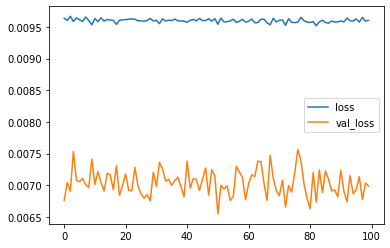

In [32]:
# And then I can actually plot this out.

loss_df.plot()

# Typically in Neural Network training, you start of with a very high loss during your first couple of epoch runs.
# And then, as your weights and biases are starting to adjusting, you hopefully see kind of a steady but steep decline
# in your loss, or your error. And eventually, it will level off where you are not really doing any sort of improvements
# as you train more and more.

# I can directly compare the plot behavior of my "blue" training loss, versus my "orange" validation loss.
# We want a signal where it is decreasing, both the training loss and the validation loss.
# And then there should be no increase in in the validation set.
# Actually, what that means technically, we could have continued training.
# If the validation loss is also going down, that is an indicator that we could continue training without overfitting to our training data.

# If you saw this orange line begin to spike after some of these epochs, so it is starting to go up and up and up,
# that means that you are overtraining to the training data, because now you have a much larger loss on your validation data.

In [73]:
model.evaluate(x_test, y_test, verbose=0)
model.evaluate(x_train, y_train, verbose=0)
test_predictions = model.predict(x_test)
test_predictions = pd.Series(test_predictions.reshape(98,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

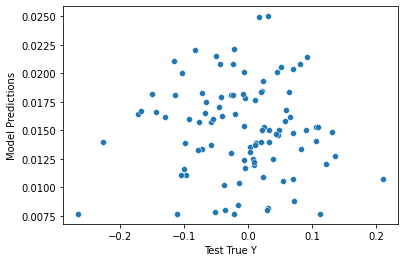

In [34]:
# So, what I could do is say, create a scatterplot, based of this data in my prediction dataframe.
sns.scatterplot(x='Test True Y', y='Model Predictions', data = pred_df)

# And we see this result

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score


In [36]:
# Mean absolute error
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.06337025

In [37]:
# Mean squared error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.0069883903

In [38]:
# Root mean squared error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

0.08359659292609765

In [39]:
explained_variance_score(y_test, test_predictions)

-0.0059844255447387695

In [40]:
# Mean squared error
MSE_ANN = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
# Mean absolute error
MAE_ANN = mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
# Root mean squared error
RMSE_ANN = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

In [41]:
 r_squared_ANN = r2_score(y_test, test_predictions)
 print(r_squared_ANN)
 print(MSE_ANN)
 print(MAE_ANN)
 print(RMSE_ANN)

-0.08728069419240891
0.0069883903
0.06337025
0.08359659292609765


In [42]:
print(r_squared_FF3)
print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE_reg )

-0.09813165458626694
MSE = 0.00705813420242858
MAE = 0.06368994930590817
Root MSE = 0.0840127026254279


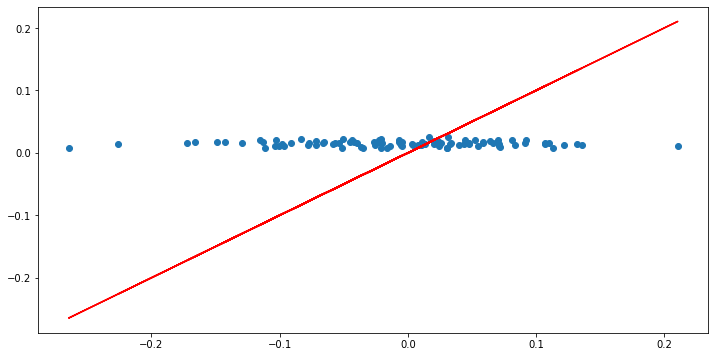

In [43]:
# What we can also compare is our predictions, and we can plot them out, against a perfect fit.

plt.figure(figsize=(12,6))
plt.scatter(y_test, test_predictions)
plt.plot(y_test,y_test,'red')

# The red line represents the perfect prediction line.
# We notice that we are being punished here by these outliers.

# What may be worth, is to retrain our model just on that bottom 99 % of these returns.
# And so, if come up to a situation where our returns is 10% for example, we will just say sorry, our model is not good enough for this.
# And we will only refit to the bottom of that 99%.

# Again, it depends on the type of context and what question you are trying to andenr, or what problem we are trying to solve.

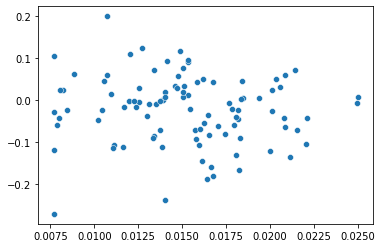

In [74]:
#heteroscedasticity visualization
residuals = y_test-test_predictions
sns.scatterplot(x= test_predictions, y= residuals)

 **Second option: Early stopping
Used to prevent overfitting** 



In [44]:
model_2 = Sequential()

model_2.add(Dense(3,activation='relu'))
model_2.add(Dense(1,activation='relu')) 
#model.add(Dense(56,activation='relu')) 
# model.add(Dense(113,activation='relu')) 

model_2.add(Dense(1))

model_2.compile(optimizer='adam',loss='mse')

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
# help(EarlyStopping)
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model_2.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=1, epochs=100, callbacks=[early_stop])

Epoch 1/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0097 - val_loss: 0.0069
Epoch 2/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0097 - val_loss: 0.0070
Epoch 3/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0078
Epoch 4/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0074
Epoch 5/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0077
Epoch 6/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0067
Epoch 7/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0073
Epoch 8/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0071
Epoch 9/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0070
Epoch 10/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0096 - val_lo

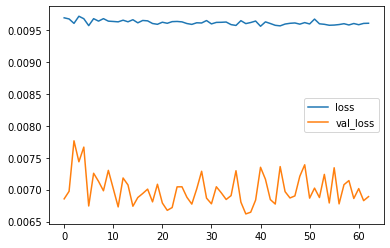

In [47]:
model_loss = pd.DataFrame(model_2.history.history)
model_loss.plot()

In [48]:
model_2.evaluate(x_test, y_test, verbose=0)
model_2.evaluate(x_train, y_train, verbose=0)
test_predictions = model_2.predict(x_test)
test_predictions = pd.Series(test_predictions.reshape(98,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

In [49]:
 r_squared_ANN_2 = r2_score(y_test, test_predictions)
 print(r_squared_ANN_2)

-0.0720114127789635


In [50]:
MAE_ANN2 = mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
MSE_ANN2 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
RMSE_ANN2 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5


print(MSE_ANN2)
print(MAE_ANN2)
print(RMSE_ANN2)

0.0068902494
0.06305752
0.08300752639721203


In [51]:
print(r_squared_FF3)
print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE_reg )

-0.09813165458626694
MSE = 0.00705813420242858
MAE = 0.06368994930590817
Root MSE = 0.0840127026254279


**Option 3:** **Dropout**

In [52]:
#@title
from tensorflow.keras.layers import Dropout
from tensorflow.keras.metrics import Accuracy

In [53]:
#@title
model_3 = Sequential()

model_3.add(Dense(3,activation='relu')) 
model_3.add(Dropout(0.25)) # half of (25%) these neurons will be turned of randomly during each batch

model_3.add(Dense(1,activation='relu')) 
model_3.add(Dropout(0.25)) # half of (25%) these neurons will be turned of randomly during each batch

# model.add(Dense(56,activation='relu')) 
# model.add(Dropout(0.3)) # half of (50%) these neurons will be turned of randomly during each batch


model_3.add(Dense(1))

model_3.compile(optimizer='adam',loss='mse')

In [54]:
#@title
model_3.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=1, epochs=100, callbacks=[early_stop])

Epoch 1/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0097 - val_loss: 0.0068
Epoch 2/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0073
Epoch 3/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0071
Epoch 4/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0070
Epoch 5/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0096 - val_loss: 0.0068
Epoch 6/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0071
Epoch 7/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0069
Epoch 8/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0071
Epoch 9/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0071
Epoch 10/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0096 - val_lo

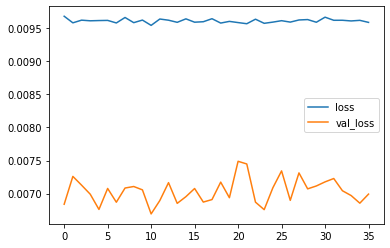

In [55]:
#@title
model_loss = pd.DataFrame(model_3.history.history)
model_loss.plot()

In [56]:
#@title
model_3.evaluate(x_test, y_test, verbose=0)
model_3.evaluate(x_train, y_train, verbose=0)
test_predictions = model_3.predict(x_test)
test_predictions = pd.Series(test_predictions.reshape(98,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

In [57]:
r_squared_ANN_3 = r2_score(y_test, test_predictions)
print(r_squared_ANN_3)

-0.08790694972643842


In [58]:
MAE_ANN3 = mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
MSE_ANN3 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
RMSE_ANN3 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

r_squared_ANN3 = r2_score(y_test, test_predictions)
print(r_squared_ANN3)
print(MSE_ANN3)
print(MAE_ANN3)
print(RMSE_ANN3)

-0.08790694972643842
0.0069924155
0.06348004
0.08362066446171765


In [59]:
print(r_squared_FF3)
print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE_reg )

-0.09813165458626694
MSE = 0.00705813420242858
MAE = 0.06368994930590817
Root MSE = 0.0840127026254279
